In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import csv
import random


In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/My Drive/SNA/web-Google.txt"


In [ ]:
res=[]
with open(path) as f:
  data = f.readlines()
for l in data:
  if l:
    words = l.split()
    res.append(words)
res

[['#',
  'Directed',
  'graph',
  '(each',
  'unordered',
  'pair',
  'of',
  'nodes',
  'is',
  'saved',
  'once):',
  'web-Google.txt'],
 ['#', 'Webgraph', 'from', 'the', 'Google', 'programming', 'contest,', '2002'],
 ['#', 'Nodes:', '875713', 'Edges:', '5105039'],
 ['#', 'FromNodeId', 'ToNodeId'],
 ['0', '11342'],
 ['0', '824020'],
 ['0', '867923'],
 ['0', '891835'],
 ['11342', '0'],
 ['11342', '27469'],
 ['11342', '38716'],
 ['11342', '309564'],
 ['11342', '322178'],
 ['11342', '387543'],
 ['11342', '427436'],
 ['11342', '538214'],
 ['11342', '638706'],
 ['11342', '645018'],
 ['11342', '835220'],
 ['11342', '856657'],
 ['11342', '867923'],
 ['11342', '891835'],
 ['824020', '0'],
 ['824020', '91807'],
 ['824020', '322178'],
 ['824020', '387543'],
 ['824020', '417728'],
 ['824020', '438493'],
 ['824020', '500627'],
 ['824020', '535748'],
 ['824020', '695578'],
 ['824020', '867923'],
 ['824020', '891835'],
 ['867923', '0'],
 ['867923', '11342'],
 ['867923', '136593'],
 ['867923', '414

In [ ]:
#taking 1000 random samples from the data
sample = random.sample(res, 1000)
filename=open('data6.txt','a')
for item in sample:
  filename.write(item[0] + " " + item[1] + "\n")

In [ ]:
sample

[['333065', '798933'],
 ['510458', '730475'],
 ['771463', '242886'],
 ['326935', '732007'],
 ['782982', '910688'],
 ['498246', '466323'],
 ['331059', '119710'],
 ['137465', '727611'],
 ['155568', '688017'],
 ['272933', '764427'],
 ['278286', '478331'],
 ['318726', '309463'],
 ['353023', '811884'],
 ['429022', '312504'],
 ['886293', '198409'],
 ['277582', '256372'],
 ['122595', '589763'],
 ['873186', '704396'],
 ['281555', '145378'],
 ['144142', '290569'],
 ['462260', '312035'],
 ['813451', '377028'],
 ['616969', '25502'],
 ['342813', '429479'],
 ['509823', '587669'],
 ['200337', '35071'],
 ['403065', '97564'],
 ['822623', '591499'],
 ['149486', '621670'],
 ['773685', '711856'],
 ['664698', '771889'],
 ['384155', '861136'],
 ['734211', '489369'],
 ['211387', '747798'],
 ['290123', '534167'],
 ['523554', '76969'],
 ['835241', '191990'],
 ['219321', '209728'],
 ['580036', '667395'],
 ['116260', '48596'],
 ['435098', '427825'],
 ['733247', '903245'],
 ['188794', '83326'],
 ['429721', '3513

In [ ]:
G1=nx.read_edgelist('data6.txt',nodetype=int,create_using=nx.DiGraph())
G2=nx.read_edgelist(path,nodetype=int,create_using=nx.DiGraph())
print(nx.info(G1))


Name: 
Type: DiGraph
Number of nodes: 1180
Number of edges: 596
Average in degree:   0.5051
Average out degree:   0.5051


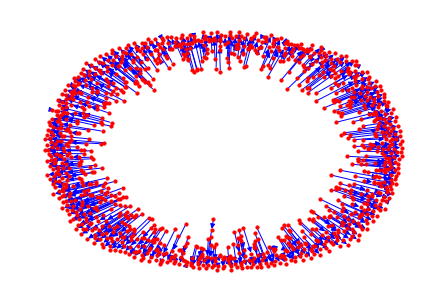

In [ ]:
nx.draw(G1, pos=None, node_color='r', edge_color='b',node_size=10)
plt.show()

In [ ]:
#Degree Centrality
# In Degree
indegree = G1.degree()
print("Maximum indegree:")
index = max(nx.in_degree_centrality(G1),key=(nx.in_degree_centrality(G1)).get)
value = indegree[index]
print("\nNode Degree")
weight = 1
for p,q in indegree:
  if q == value and weight <= 5:
    print(str(p)+"\t"+str(q))
    weight += 1
print("Degree of some nodes:")
print("\nNode    Degree")
weight = 1
for p,q in indegree:
  if weight <= 5:
    print(str(p)+"\t"+str(q))
    weight=weight+1

Maximum indegree:

Node Degree
384666	3
Degree of some nodes:

Node    Degree
333065	1
798933	1
510458	1
730475	1
771463	1


In [ ]:
# Out Degree
outdegree = G1.degree()
print ("Maximum degree centrality:")
index = max(nx.out_degree_centrality(G1),key=(nx.out_degree_centrality(G1)).get)
val = outdegree[index]
print("Node Degree")
w = 1
for p,q in outdegree:
  if q == val and w <= 5:
    print(str(p)+"\t"+str(q))
    w += 1
print("\nDegree of some nodes:")
w = 1
print("\nNode   Degree")
for p,q in outdegree:
  if(w <= 5):
    print(str(p)+"\t"+str(q))
    w=w+1

Maximum degree centrality:
Node Degree
333065	1
798933	1
510458	1
730475	1
771463	1

Degree of some nodes:

Node   Degree
333065	1
798933	1
510458	1
730475	1
771463	1


In [ ]:
#eigen vector centrality
eigen_cent = nx.eigenvector_centrality_numpy(G1)
maximum = max(eigen_cent.values())
print("Maximum eigen centrality are :")
print("Node Eigen Vector Centrality")
for node in eigen_cent.keys():
  if (eigen_cent[node] == maximum):
    print(f'{node}\t {eigen_cent[node]}')
print("\nEigen Vector Centrality of some nodes are:\n")
print("Node \t Eigen Vector Centrality")
# sorting based on values
eigen_cent_sorted = sorted(eigen_cent, key=eigen_cent.get, reverse=True)
w = 1
for q in eigen_cent:
  if(w <= 5):
    w = w + 1
    print (str(q)+"\t "+str(eigen_cent[q]))

Maximum eigen centrality are :
Node Eigen Vector Centrality
316496	 0.9917640935779675

Eigen Vector Centrality of some nodes are:

Node 	 Eigen Vector Centrality
333065	 2.529727491019511e-14
798933	 1.2609210040910422e-07
510458	 -4.8340540877854553e-14
730475	 -2.639877634983271e-07
771463	 6.729671806478602e-15


In [ ]:
#Katz centrality
katz_cent = nx.katz_centrality(G1, max_iter = 20000)
index = max(nx.katz_centrality(G1, max_iter = 20000), key = (nx.katz_centrality(G1, max_iter = 20000)).get)
maximum = katz_cent[index]
print("The nodes with maximum Katz centrality are :")
print("\nNode Degree")
for node in katz_cent:
  if (katz_cent[node] == maximum):
    print(f'{node}\t{katz_cent[node]}')
print("\nSome nodes with their Katz Centrality are:")
print("\nNode Katz Centrality")
w = 1
for node in katz_cent:
  if(w <= 8):
    print(f'{node}\t{katz_cent[node]}')
    w = w + 1


The nodes with maximum Katz centrality are :

Node Degree
384666	0.03598052720883874

Some nodes with their Katz Centrality are:

Node Katz Centrality
333065	0.02767732862218365
798933	0.030445061484402017
510458	0.02767732862218365
730475	0.030445061484402017
771463	0.02767732862218365
242886	0.030445061484402017
326935	0.02767732862218365
732007	0.030445061484402017


In [ ]:
#Page Rank
page_cent = nx.pagerank(G1, max_iter = 20000)
maximum = max(page_cent.values())
print("Maximum Page Rank centrality are :")
print("\nNode Page Rank Centrality")
for node in page_cent.keys():
  if (page_cent[node] == maximum):
    print(f'{node}\t{page_cent[node]}')
print("\nPage Rank Centrality of some nodes are:")
print("\nNode Page Rank Centrality")
w = 1
for node in page_cent:
  if(w <= 8):
    print(f'{node}\t{page_cent[node]}')
    w = w + 1


Maximum Page Rank centrality are :

Node Page Rank Centrality
384666	0.0021016351702498473

Page Rank Centrality of some nodes are:

Node Page Rank Centrality
333065	0.0005926802745814979
798933	0.001095665239804281
510458	0.0005926802745814979
730475	0.001095665239804281
771463	0.0005926802745814979
242886	0.001095665239804281
326935	0.0005926802745814979
732007	0.001095665239804281


In [ ]:
#Betweeness Centrality
bet_cent = nx.betweenness_centrality(G1)
maximum = max(bet_cent.values())
print("Maximum Betweeness Centrality are :")
print("\nNode Betweeness Centrality")
for node in bet_cent:
  if (bet_cent[node] == maximum):
    print(f'{node}\t{bet_cent[node]}')
print("\nBetweeness Centrality of some nodes are:")
print("\nNode Betweenness Centrality")
w = 1
for res in bet_cent:
  if(w <= 5):
    w = w+1
    print(str(res)+"\t"+str(bet_cent[res]))

Maximum Betweeness Centrality are :

Node Betweeness Centrality
681803	7.200139394698682e-07
307994	7.200139394698682e-07

Betweeness Centrality of some nodes are:

Node Betweenness Centrality
333065	0.0
798933	0.0
510458	0.0
730475	0.0
771463	0.0


In [ ]:
#Closeness Centrality
close_cent = nx.closeness_centrality(G1)
maximum = max(close_cent.values())
print("Maximum Closeness Centrality:")
print("\nNode Closeness Centrality")
for node in close_cent:
  if (close_cent[node] == maximum):
    print(f'{node}\t{close_cent[node]}')
print("\nCloseness Centrality of some nodes:")
print("\nNode Closeness Centrality")
dict_sorted_keys = sorted(close_cent, key=close_cent.get, reverse=True)
w = 1
for q in dict_sorted_keys:
  if(w <= 5):
    w = w+1
    print (str(q)+"\t"+str(close_cent[q]))

Maximum Closeness Centrality:

Node Closeness Centrality
384666	0.002544529262086514

Closeness Centrality of some nodes:

Node Closeness Centrality
384666	0.002544529262086514
614831	0.0016963528413910093
818382	0.0016963528413910093
54147	0.0016963528413910093
21682	0.0016963528413910093


In [ ]:
#Average local clustering coeffecient
average_local=nx.average_clustering(G2)

#Local clustering coeffecient of all nodes
print('\nClustering coeffecient of some nodes are:')
print('\nNode Local Clustering Coeffecient')
w = 1
for node, val in nx.clustering(G1).items():
  if(w <= 8):
    print(f'{node}\t{val}')
    w = w + 1


Clustering coeffecient of some nodes are:

Node Local Clustering Coeffecient
333065	0
798933	0
510458	0
730475	0
771463	0
242886	0
326935	0
732007	0


In [ ]:
# global clustering coeffecient of nodes
global_cl=np.mean(list(nx.clustering(G2).values()))


In [ ]:
#Reciprocity
reciprocity=nx.reciprocity(G2)


In [ ]:
#Transitivity
transitivity=nx.transitivity(G2)


In [ ]:
print("average local clustering coefficient:",average_local)
print("Global clustering coefficient:",global_cl)
print("Reciprocity:",reciprocity)
print("transitivity:",transitivity)

average local clustering coefficient: 0.3698306814797672
Global clustering coefficient: 0.3698306814797233
Reciprocity: 0.3067510355944391
transitivity: 0.449540234004255


In [ ]:
#Random graph with following parameters
N = 500
average_degree = np.arange(0,5.1,0.1)
y_axis = []
for i in average_degree:
  p = i/(N-1)
  G = nx.erdos_renyi_graph(N,p,seed = 42)
  graphs = list(nx.connected_components(G))
  Ng = max(graphs, key=len)
  y_axis.append(len(Ng)/N)


In [25]:
# Finding Giant Component 
list1 = sorted(nx.strongly_connected_components(G1))
print("Number of nodes in the giant component = " + str(len(list1)) + '\n')
print("Set of nodes in the giant component:")
list1

Number of nodes in the giant component = 1180

Set of nodes in the giant component:


[{798933},
 {333065},
 {730475},
 {510458},
 {242886},
 {771463},
 {732007},
 {326935},
 {910688},
 {782982},
 {466323},
 {498246},
 {119710},
 {331059},
 {727611},
 {137465},
 {688017},
 {155568},
 {764427},
 {272933},
 {478331},
 {278286},
 {309463},
 {318726},
 {811884},
 {353023},
 {312504},
 {429022},
 {198409},
 {886293},
 {256372},
 {277582},
 {589763},
 {122595},
 {704396},
 {873186},
 {145378},
 {281555},
 {290569},
 {144142},
 {312035},
 {462260},
 {377028},
 {813451},
 {25502},
 {616969},
 {429479},
 {342813},
 {587669},
 {509823},
 {35071},
 {200337},
 {97564},
 {403065},
 {591499},
 {822623},
 {621670},
 {149486},
 {711856},
 {773685},
 {771889},
 {664698},
 {861136},
 {384155},
 {489369},
 {734211},
 {747798},
 {211387},
 {534167},
 {290123},
 {76969},
 {523554},
 {191990},
 {835241},
 {209728},
 {219321},
 {667395},
 {580036},
 {48596},
 {116260},
 {427825},
 {435098},
 {903245},
 {733247},
 {83326},
 {188794},
 {351307},
 {429721},
 {688747},
 {726098},
 {831172},
 {566

In [ ]:
#Values <k> and Ng/N
print("<k>\t Ng/N")
for i in range(len(average_degree)):
  print ("{0:.1f}".format(average_degree[i]),'\t',y_axis[i])

<k>	 Ng/N
0.0 	 0.002
0.1 	 0.006
0.2 	 0.01
0.3 	 0.012
0.4 	 0.012
0.5 	 0.018
0.6 	 0.018
0.7 	 0.02
0.8 	 0.034
0.9 	 0.056
1.0 	 0.066
1.1 	 0.108
1.2 	 0.118
1.3 	 0.312
1.4 	 0.436
1.5 	 0.504
1.6 	 0.61
1.7 	 0.7
1.8 	 0.714
1.9 	 0.758
2.0 	 0.782
2.1 	 0.804
2.2 	 0.824
2.3 	 0.838
2.4 	 0.848
2.5 	 0.872
2.6 	 0.9
2.7 	 0.92
2.8 	 0.922
2.9 	 0.928
3.0 	 0.928
3.1 	 0.94
3.2 	 0.942
3.3 	 0.948
3.4 	 0.956
3.5 	 0.958
3.6 	 0.96
3.7 	 0.964
3.8 	 0.964
3.9 	 0.964
4.0 	 0.974
4.1 	 0.98
4.2 	 0.986
4.3 	 0.988
4.4 	 0.988
4.5 	 0.988
4.6 	 0.988
4.7 	 0.988
4.8 	 0.988
4.9 	 0.99
5.0 	 0.992


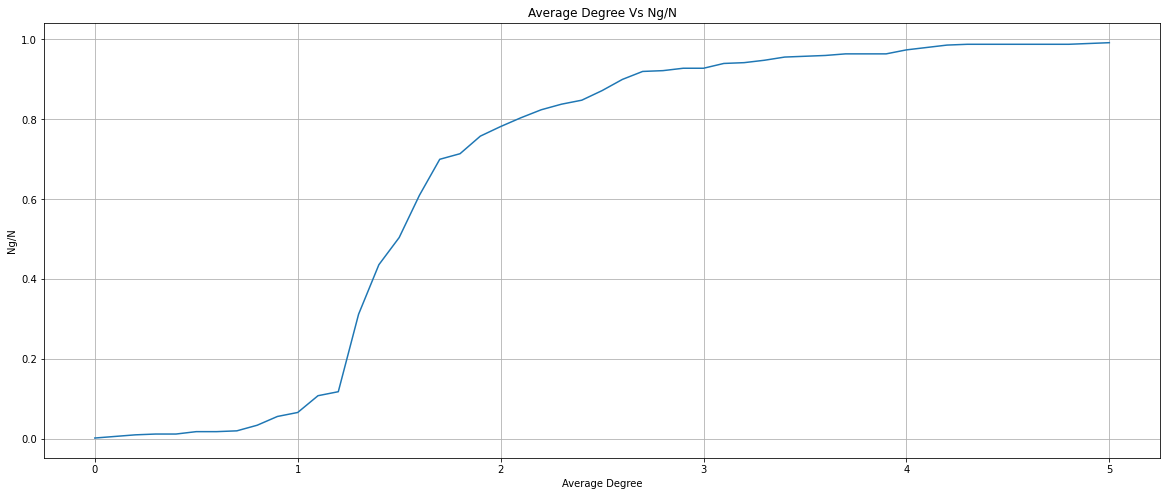

In [ ]:
#Graph between <k> an Ng/N
plt.figure(figsize=(20,8))
plt.xlabel("Average Degree")
plt.ylabel("Ng/N")
plt.title("Average Degree Vs Ng/N")
plt.grid()
plt.plot(average_degree,y_axis)
plt.show()
